<a href="https://colab.research.google.com/github/HyeonhoonLee/Colab/blob/master/KDC_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KIOM 한의임상정보은행 data 분석하기

일단 데이터를 추출해서 상관분석을 전부 돌려보자.

# 라이브러리 로드

In [1]:
# 분석에 사용할 pandas, 수치계산에 사용할 numpy, 시각화에 사용할 seaborn 을 불러옵니다.
# 또, 구 버전의 주피터 노트북에서는 %matplotlib inline 설정을 되어야 노트북 안에서 그래프를 시각화 합니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#한글 폰트 설정

In [2]:
# Google Colab 사용 시 아래 주석을 풀고 폰트설정을 합니다.
# 로컬 아나콘다 사용 시에는 그대로 주석처리 해놓으시면 됩니다.
# 나눔고딕 설치
# 이 코드를 사용시 아래에 있는 폰트를 로드할 경우 colab에서는 오류가 발생하니
# 아래에 있는 폰트 설정은 꼭 주석처리를 해주세요. 
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

fm._rebuild()

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumGothic') 
# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc("axes", unicode_minus=False)

In [3]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

#데이터 불러오기

- 데이터 로드 주소: https://www.data.go.kr/data/3072201/fileData.do
- 임상정보은행 사이트에서 상세이용방법 확인가능 (https://kdc.kiom.re.kr/html/?pmode=subpage&MMC_pid=200&spSeq=22)

In [4]:
# 다운로드 받은 파일을 판다스의 read_csv 를 통해 읽어옵니다.
# 파일을 읽어온 후 shape 로 행과 열의 수를 출력합니다.

##UTF-8이 아니면, encoding=에다가 cp949나 euc-kr을 넣어줘야한다.
df = pd.read_csv("/content/drive/My Drive/DataCollection/KIOM_KDC/data/한의임상정보은행 교육용 데이터 (2016.10.27)..csv", encoding="cp949")
df.shape

(500, 73)

In [5]:
# sample, head, tail을 통해 데이터를 미리보기 합니다.
df.sample(5)

,대상자식별코드,성별,만나이,직업분류,학력,결혼유무,음주력,흡연력,성격_대범_섬세,성격_행동빠름_행동느림,성격_적극_소극,성격_직접_간접,성격_포기빠름_포기느림,성격_외향_내성,성격_동적_정적,성격_쉽게_어렵게,성격_남성적_여성적,성격_참을성부족_잘찾음,성격_큰편_적은편,성격_잘드러냄_안드러냄,성격_잘표현_표현안하는편,성격_가끔흥분_이성적,성격_덜렁_꼼꼼,식사량,식사속도,소화여부,소화입맛,땀정도,땀기분,대변습관,대변굳기,배변시긴박감,배변후잔변감,소변야간뇨,한열민감도,한열손부위,한열발부위,한열배부위,음수정도,음수온다,한열점수,한열그룹,고혈압_진단,당뇨_진단,고지혈증_진단,일반건강,수면시간(시간),수면시간(분),피로정도,피로_기상시,피로_오전,피로_오후,피로_밤,피로_하루종일,한의사체질진단,키,몸무게,BMI,이마둘레,목둘레,겨드랑이둘레,가슴둘레,늑골둘레,허리둘레,장골둘레,곡골둘레,수축기혈합,이완기혈압,혈당,총콜레스테롤,중성지방,고밀도콜레스테롤,저밀도콜레스테롤
169,KDCT00170,2,61.734,14,5,2,999,999,3,2,3,2,1,3,2,2,3,1,2,3,3,3,3,2,2,1,3,2,3,1,2,999,999,0.0,2,1,1,1,3,3,15,3,1,1,1,2,7,0,2,0,0,1,0,0,2,150.0,64.0,28.4,53.8,34.5,94.5,98.0,83.0,91.5,95.2,95.0,150,87,116,213,91,48,134
55,KDCT00056,2,59.507,6,2,4,999,999,2,1,1,3,2,3,1,3,2,3,3,3,1,3,1,2,2,1,2,2,2,1,2,999,999,0.0,3,1,2,2,1,1,13,3,2,1,2,3,7,0,2,0,0,1,0,0,3,155.4,55.5,23.0,57.8,38.7,84.5,86.7,76.0,85.0,92.3,87.9,126,78,95,186,181,47,102
86,KDCT00087,2,73.156,6,1,4,999,999,1,1,1,1,1,1,1,1,1,2,1,1,1,1,2,999,3,2,4,3,999,2,2,999,999,3.0,3,1,1,1,2,2,16,3,1,1,1,2,5,0,3,0,0,0,1,0,3,152.0,45.0,19.5,52.0,29.0,81.0,82.0,72.0,72.0,81.0,83.0,100,60,95,174,120,44,94
28,KDCT00029,2,40.427,2,5,2,999,999,2,1,1,1,1,1,1,1,2,1,2,1,1,1,2,2,1,1,2,3,3,2,2,999,999,0.0,3,2,2,2,3,2,12,2,2,2,1,3,7,0,2,0,0,0,1,0,3,153.0,56.0,23.9,53.0,34.0,92.0,79.0,77.0,77.0,80.0,93.0,120,80,79,147,132,34,79
164,KDCT00165,2,31.342,2,5,2,999,999,3,2,3,3,2,3,3,3,3,1,1,2,3,2,1,2,3,1,2,1,3,1,2,999,999,1.0,2,3,3,3,4,1,9,1,1,1,1,3,5,0,2,1,1,0,0,0,3,163.0,45.0,16.9,54.0,31.3,75.0,75.5,63.5,72.3,73.5,84.5,110,69,92,185,88,52,96


#기본정보 보기

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   대상자식별코드        500 non-null    object 
 1   성별             500 non-null    int64  
 2   만나이            500 non-null    float64
 3   직업분류           500 non-null    int64  
 4   학력             500 non-null    int64  
 5   결혼유무           500 non-null    int64  
 6   음주력            500 non-null    int64  
 7   흡연력            500 non-null    int64  
 8   성격_대범_섬세       500 non-null    int64  
 9   성격_행동빠름_행동느림   500 non-null    int64  
 10  성격_적극_소극       500 non-null    int64  
 11  성격_직접_간접       500 non-null    int64  
 12  성격_포기빠름_포기느림   500 non-null    int64  
 13  성격_외향_내성       500 non-null    int64  
 14  성격_동적_정적       500 non-null    int64  
 15  성격_쉽게_어렵게      500 non-null    int64  
 16  성격_남성적_여성적     500 non-null    int64  
 17  성격_참을성부족_잘찾음   500 non-null    int64  
 18  성격_큰편_적은편 

In [7]:
# 컬럼들을 한번에 확인합니다.
df.columns

Index(['대상자식별코드', '성별', '만나이', '직업분류', '학력', '결혼유무', '음주력', '흡연력', '성격_대범_섬세',
       '성격_행동빠름_행동느림', '성격_적극_소극', '성격_직접_간접', '성격_포기빠름_포기느림', '성격_외향_내성',
       '성격_동적_정적', '성격_쉽게_어렵게', '성격_남성적_여성적', '성격_참을성부족_잘찾음', '성격_큰편_적은편',
       '성격_잘드러냄_안드러냄', '성격_잘표현_표현안하는편', '성격_가끔흥분_이성적', '성격_덜렁_꼼꼼', '식사량',
       '식사속도', '소화여부', '소화입맛', '땀정도', '땀기분', '대변습관', '대변굳기', '배변시긴박감',
       '배변후잔변감', '소변야간뇨', '한열민감도', '한열손부위', '한열발부위', '한열배부위', '음수정도', '음수온다',
       '한열점수', '한열그룹', '고혈압_진단', '당뇨_진단', '고지혈증_진단', '일반건강', '수면시간(시간)',
       '수면시간(분)', '피로정도', '피로_기상시', '피로_오전', '피로_오후', '피로_밤', '피로_하루종일',
       '한의사체질진단', '키', '몸무게', 'BMI', '이마둘레', '목둘레', '겨드랑이둘레', '가슴둘레', '늑골둘레',
       '허리둘레', '장골둘레', '곡골둘레', '수축기혈합', '이완기혈압', '혈당', '총콜레스테롤', '중성지방',
       '고밀도콜레스테롤', '저밀도콜레스테롤'],
      dtype='object')

In [8]:
# dtypes 를 통해 데이터 형식만 출력합니다.
df.dtypes

대상자식별코드      object
성별            int64
만나이         float64
직업분류          int64
학력            int64
             ...   
혈당            int64
총콜레스테롤        int64
중성지방          int64
고밀도콜레스테롤      int64
저밀도콜레스테롤      int64
Length: 73, dtype: object

#Feature engineering

In [9]:
# object type이 있는지 확인한다.
df.describe(include="object")

,대상자식별코드
count,500
unique,500
top,KDCT00072
freq,1


In [10]:
# 일단,"대상자식별코드"컬럼은 index로 바꿔줍니다.
df = df.set_index("대상자식별코드")
df.head()

,성별,만나이,직업분류,학력,결혼유무,음주력,흡연력,성격_대범_섬세,성격_행동빠름_행동느림,성격_적극_소극,성격_직접_간접,성격_포기빠름_포기느림,성격_외향_내성,성격_동적_정적,성격_쉽게_어렵게,성격_남성적_여성적,성격_참을성부족_잘찾음,성격_큰편_적은편,성격_잘드러냄_안드러냄,성격_잘표현_표현안하는편,성격_가끔흥분_이성적,성격_덜렁_꼼꼼,식사량,식사속도,소화여부,소화입맛,땀정도,땀기분,대변습관,대변굳기,배변시긴박감,배변후잔변감,소변야간뇨,한열민감도,한열손부위,한열발부위,한열배부위,음수정도,음수온다,한열점수,한열그룹,고혈압_진단,당뇨_진단,고지혈증_진단,일반건강,수면시간(시간),수면시간(분),피로정도,피로_기상시,피로_오전,피로_오후,피로_밤,피로_하루종일,한의사체질진단,키,몸무게,BMI,이마둘레,목둘레,겨드랑이둘레,가슴둘레,늑골둘레,허리둘레,장골둘레,곡골둘레,수축기혈합,이완기혈압,혈당,총콜레스테롤,중성지방,고밀도콜레스테롤,저밀도콜레스테롤
대상자식별코드,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
KDCT00001,2,48.666,2,5,2,999,999,2,2,1,2,1,1,1,2,2,3,2,2,2,1,1,2,2,1,3,3,1,1,2,999,999,1.0,1,2,2,2,2,2,12,2,1,1,1,3,5,0,2,0,0,0,1,0,2,158.0,55.0,22.0,53.0,33.0,92.0,96.0,89.0,82.0,91.0,96.0,120,80,104,219,72,60,128
KDCT00002,2,80.773,14,3,2,999,999,1,1,1,1,1,1,1,2,1,3,1,1,1,1,3,2,2,1,3,1,2,1,2,999,999,1.0,2,2,2,2,2,3,13,3,1,1,1,3,5,0,4,0,0,1,0,0,3,155.0,63.0,26.2,59.0,35.0,96.0,101.0,93.0,92.0,96.0,99.0,124,65,110,199,97,46,114
KDCT00003,1,50.008,3,3,2,999,999,3,1,1,1,1,1,1,1,1,2,1,1,1,1,3,3,2,3,2,3,1,1,2,999,999,1.0,3,2,3,2,2,2,12,2,1,1,1,3,7,0,2,0,0,1,0,0,2,160.0,59.0,23.0,57.0,37.0,95.0,90.0,83.0,80.0,81.0,81.0,121,75,79,216,88,49,132
KDCT00004,2,50.551,14,4,2,999,999,1,1,1,1,1,1,1,2,1,1,1,2,1,1,2,999,1,3,2,2,3,2,2,999,999,1.0,2,2,2,2,1,2,15,3,1,1,1,4,7,0,4,0,0,1,0,0,2,165.0,76.0,27.9,59.0,37.0,100.0,104.0,90.0,91.0,94.0,99.0,113,81,100,218,136,44,136
KDCT00005,1,49.581,8,2,2,999,999,3,2,3,2,2,3,2,2,2,3,3,2,2,2,1,2,1,1,3,1,2,1,2,999,999,0.0,1,3,3,2,1,2,11,2,1,1,1,2,5,0,4,0,0,1,0,0,1,165.0,70.0,25.7,60.0,40.0,106.0,102.0,99.0,98.0,98.0,100.0,129,72,92,186,61,33,118


## 수치형 변수를 범주형 변수로 바꾸기

In [11]:
#1 수면시간(시간)을 2개의 범주형 변수로 나누어본다.
df["수면시간(시간)_부족"] = df["수면시간(시간)"] < 6
df[["수면시간(시간)_부족", "수면시간(시간)"]].head()

,수면시간(시간)_부족,수면시간(시간)
대상자식별코드,,
KDCT00001,True,5
KDCT00002,True,5
KDCT00003,False,7
KDCT00004,False,7
KDCT00005,True,5


In [146]:
#2 늑골둘레를 3가지 범주형 변수로 나누어본다. ==> One-hot enconding
## 여기서는 수치 => 범주 => 수치 로 one-hot enconding이 되었는데, 
## one-hot encoding은 주로 범주=>수치 로 할 때 많이 사용한다.
# EDA displot 결과를 보고 임의로 70/80으로 나누어봤는데 모델 정확도가 오히려 떨어져서 70/90으로 바꾸어보았다.
df["늑골둘레_low"]=df["늑골둘레"]<70
df["늑골둘레_middle"]= (df["늑골둘레"]>=70) & (df["늑골둘레"]<85)
df["늑골둘레_high"]=df["늑골둘레"]>=85
df[["늑골둘레_low","늑골둘레_middle","늑골둘레_high"]].head()

,늑골둘레_low,늑골둘레_middle,늑골둘레_high
대상자식별코드,,,
KDCT00001,False,False,True
KDCT00002,False,False,True
KDCT00003,False,True,False
KDCT00004,False,False,True
KDCT00005,False,False,True


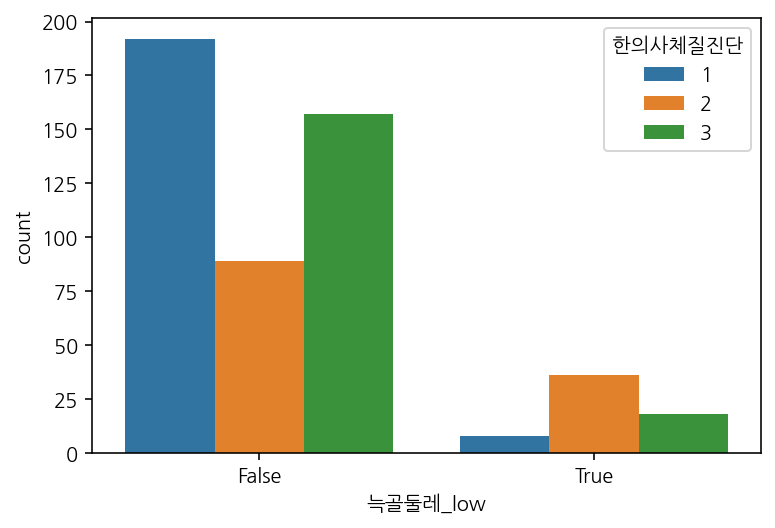

In [147]:
#2(cont') 위에서 나눈 것을 시각화해보자.
## low일 때 확연히 소음인이 많은 것을 확인할 수 있다.
sns.countplot(data=df, x="늑골둘레_low", hue="한의사체질진단")

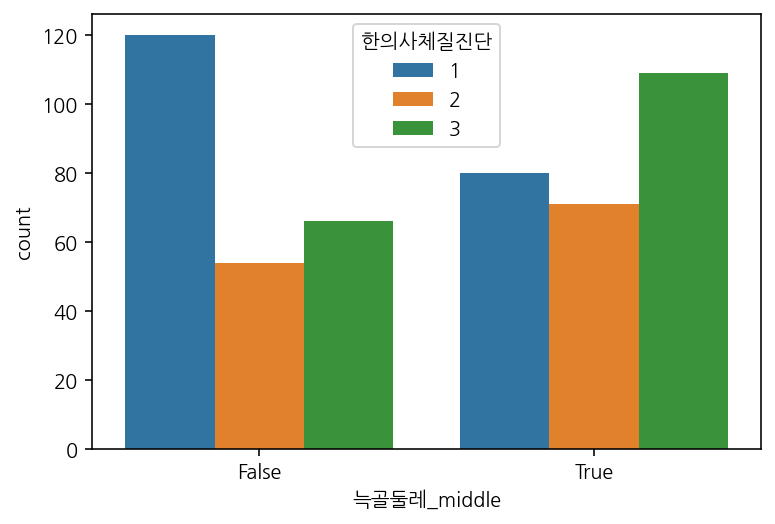

In [148]:
#2(cont') 위에서 나눈 것을 시각화해보자.
sns.countplot(data=df, x="늑골둘레_middle", hue="한의사체질진단")

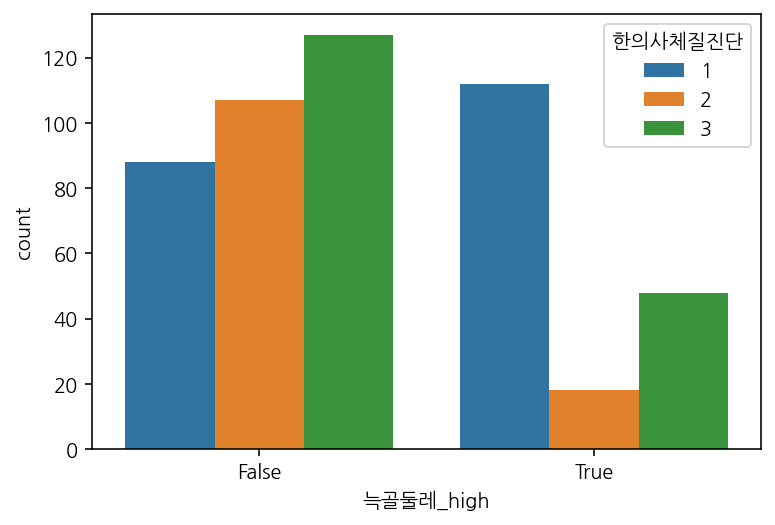

In [149]:
#2(cont') 위에서 나눈 것을 시각화해보자.
sns.countplot(data=df, x="늑골둘레_high", hue="한의사체질진단")

#학습, 예측 데이터셋 나누기

In [150]:
# 8:2 의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count 라는 변수에 담습니다.
split_count = int(df.shape[0] * 0.8)
split_count

400

In [151]:
# train, test로 슬라이싱을 통해 데이터를 나눕니다.
train = df[:split_count].copy()
train.shape

(400, 76)

In [152]:
test = df[split_count:].copy()
test.shape

(100, 76)

In [153]:
# 학습과 예측에 사용할 컬럼을 만들어 줍니다.
# feature_names 라는 변수에 담아줍니다.
## 이전에 썼던 방법과 달리 먼저 리스트형태로 만든 다음에, remove함수를 통해 제외시켜줍니다.
feature_names = train.columns.tolist()
#1 "한의사체질진단"은 label 값이기 때문에 제외합니다.
#1 "수면시간(시간)_부족"이라는 범주형 변수를 만들어줬으므로, 기존 연속형 변수는 제외합니다.
feature_names.remove("수면시간(시간)")
feature_names.remove("한의사체질진단")

#2 Feature engineering에서 늑골둘레를 범주형 변수로 바꾸어주었으므로, 기존 연속형 변수를 제외합니다.
feature_names.remove("늑골둘레")

feature_names

## *이전에 썼던 방법 참고
# feature_columns = df.columns.difference(["한의사체질진단"]).tolist()
# feature_columns

['성별',
 '만나이',
 '직업분류',
 '학력',
 '결혼유무',
 '음주력',
 '흡연력',
 '성격_대범_섬세',
 '성격_행동빠름_행동느림',
 '성격_적극_소극',
 '성격_직접_간접',
 '성격_포기빠름_포기느림',
 '성격_외향_내성',
 '성격_동적_정적',
 '성격_쉽게_어렵게',
 '성격_남성적_여성적',
 '성격_참을성부족_잘찾음',
 '성격_큰편_적은편',
 '성격_잘드러냄_안드러냄',
 '성격_잘표현_표현안하는편',
 '성격_가끔흥분_이성적',
 '성격_덜렁_꼼꼼',
 '식사량',
 '식사속도',
 '소화여부',
 '소화입맛',
 '땀정도',
 '땀기분',
 '대변습관',
 '대변굳기',
 '배변시긴박감',
 '배변후잔변감',
 '소변야간뇨',
 '한열민감도',
 '한열손부위',
 '한열발부위',
 '한열배부위',
 '음수정도',
 '음수온다',
 '한열점수',
 '한열그룹',
 '고혈압_진단',
 '당뇨_진단',
 '고지혈증_진단',
 '일반건강',
 '수면시간(분)',
 '피로정도',
 '피로_기상시',
 '피로_오전',
 '피로_오후',
 '피로_밤',
 '피로_하루종일',
 '키',
 '몸무게',
 'BMI',
 '이마둘레',
 '목둘레',
 '겨드랑이둘레',
 '가슴둘레',
 '허리둘레',
 '장골둘레',
 '곡골둘레',
 '수축기혈합',
 '이완기혈압',
 '혈당',
 '총콜레스테롤',
 '중성지방',
 '고밀도콜레스테롤',
 '저밀도콜레스테롤',
 '수면시간(시간)_부족',
 '늑골둘레_low',
 '늑골둘레_middle',
 '늑골둘레_high']

In [154]:
## 수면시간(분) 항목이 있음을 추가로확인함.
train["수면시간(분)"].value_counts()

0     366
30     28
20      3
40      2
50      1
Name: 수면시간(분), dtype: int64

In [155]:
## 대부분 0분으로 표시하였으므로, 임의로 내림으로 간주하고 해당 컬럼을 삭제함.
feature_names.remove("수면시간(분)")
feature_names

['성별',
 '만나이',
 '직업분류',
 '학력',
 '결혼유무',
 '음주력',
 '흡연력',
 '성격_대범_섬세',
 '성격_행동빠름_행동느림',
 '성격_적극_소극',
 '성격_직접_간접',
 '성격_포기빠름_포기느림',
 '성격_외향_내성',
 '성격_동적_정적',
 '성격_쉽게_어렵게',
 '성격_남성적_여성적',
 '성격_참을성부족_잘찾음',
 '성격_큰편_적은편',
 '성격_잘드러냄_안드러냄',
 '성격_잘표현_표현안하는편',
 '성격_가끔흥분_이성적',
 '성격_덜렁_꼼꼼',
 '식사량',
 '식사속도',
 '소화여부',
 '소화입맛',
 '땀정도',
 '땀기분',
 '대변습관',
 '대변굳기',
 '배변시긴박감',
 '배변후잔변감',
 '소변야간뇨',
 '한열민감도',
 '한열손부위',
 '한열발부위',
 '한열배부위',
 '음수정도',
 '음수온다',
 '한열점수',
 '한열그룹',
 '고혈압_진단',
 '당뇨_진단',
 '고지혈증_진단',
 '일반건강',
 '피로정도',
 '피로_기상시',
 '피로_오전',
 '피로_오후',
 '피로_밤',
 '피로_하루종일',
 '키',
 '몸무게',
 'BMI',
 '이마둘레',
 '목둘레',
 '겨드랑이둘레',
 '가슴둘레',
 '허리둘레',
 '장골둘레',
 '곡골둘레',
 '수축기혈합',
 '이완기혈압',
 '혈당',
 '총콜레스테롤',
 '중성지방',
 '고밀도콜레스테롤',
 '저밀도콜레스테롤',
 '수면시간(시간)_부족',
 '늑골둘레_low',
 '늑골둘레_middle',
 '늑골둘레_high']

#정답이자 예측해야될 값

In [156]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.
label_name = "한의사체질진단"
label_name

'한의사체질진단'

# 학습, 예측 데이터셋 만들기

In [157]:
# 학습 세트 만들기 예) 시험의 기출문제

X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(400, 72)


,성별,만나이,직업분류,학력,결혼유무,음주력,흡연력,성격_대범_섬세,성격_행동빠름_행동느림,성격_적극_소극,성격_직접_간접,성격_포기빠름_포기느림,성격_외향_내성,성격_동적_정적,성격_쉽게_어렵게,성격_남성적_여성적,성격_참을성부족_잘찾음,성격_큰편_적은편,성격_잘드러냄_안드러냄,성격_잘표현_표현안하는편,성격_가끔흥분_이성적,성격_덜렁_꼼꼼,식사량,식사속도,소화여부,소화입맛,땀정도,땀기분,대변습관,대변굳기,배변시긴박감,배변후잔변감,소변야간뇨,한열민감도,한열손부위,한열발부위,한열배부위,음수정도,음수온다,한열점수,한열그룹,고혈압_진단,당뇨_진단,고지혈증_진단,일반건강,피로정도,피로_기상시,피로_오전,피로_오후,피로_밤,피로_하루종일,키,몸무게,BMI,이마둘레,목둘레,겨드랑이둘레,가슴둘레,허리둘레,장골둘레,곡골둘레,수축기혈합,이완기혈압,혈당,총콜레스테롤,중성지방,고밀도콜레스테롤,저밀도콜레스테롤,수면시간(시간)_부족,늑골둘레_low,늑골둘레_middle,늑골둘레_high
대상자식별코드,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
KDCT00001,2,48.666,2,5,2,999,999,2,2,1,2,1,1,1,2,2,3,2,2,2,1,1,2,2,1,3,3,1,1,2,999,999,1.0,1,2,2,2,2,2,12,2,1,1,1,3,2,0,0,0,1,0,158.0,55.0,22.0,53.0,33.0,92.0,96.0,82.0,91.0,96.0,120,80,104,219,72,60,128,True,False,False,True
KDCT00002,2,80.773,14,3,2,999,999,1,1,1,1,1,1,1,2,1,3,1,1,1,1,3,2,2,1,3,1,2,1,2,999,999,1.0,2,2,2,2,2,3,13,3,1,1,1,3,4,0,0,1,0,0,155.0,63.0,26.2,59.0,35.0,96.0,101.0,92.0,96.0,99.0,124,65,110,199,97,46,114,True,False,False,True
KDCT00003,1,50.008,3,3,2,999,999,3,1,1,1,1,1,1,1,1,2,1,1,1,1,3,3,2,3,2,3,1,1,2,999,999,1.0,3,2,3,2,2,2,12,2,1,1,1,3,2,0,0,1,0,0,160.0,59.0,23.0,57.0,37.0,95.0,90.0,80.0,81.0,81.0,121,75,79,216,88,49,132,False,False,True,False
KDCT00004,2,50.551,14,4,2,999,999,1,1,1,1,1,1,1,2,1,1,1,2,1,1,2,999,1,3,2,2,3,2,2,999,999,1.0,2,2,2,2,1,2,15,3,1,1,1,4,4,0,0,1,0,0,165.0,76.0,27.9,59.0,37.0,100.0,104.0,91.0,94.0,99.0,113,81,100,218,136,44,136,False,False,False,True
KDCT00005,1,49.581,8,2,2,999,999,3,2,3,2,2,3,2,2,2,3,3,2,2,2,1,2,1,1,3,1,2,1,2,999,999,0.0,1,3,3,2,1,2,11,2,1,1,1,2,4,0,0,1,0,0,165.0,70.0,25.7,60.0,40.0,106.0,102.0,98.0,98.0,100.0,129,72,92,186,61,33,118,True,False,False,True


In [158]:
 # 정답 값을 만들어 줍니다. 예) 기출문제의 정답
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(400,)


대상자식별코드
KDCT00001    2
KDCT00002    3
KDCT00003    2
KDCT00004    2
KDCT00005    1
Name: 한의사체질진단, dtype: int64

In [159]:
# 예측에 사용할 데이터세트를 만듭니다. 예) 실전 시험 문제

X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(100, 72)


,성별,만나이,직업분류,학력,결혼유무,음주력,흡연력,성격_대범_섬세,성격_행동빠름_행동느림,성격_적극_소극,성격_직접_간접,성격_포기빠름_포기느림,성격_외향_내성,성격_동적_정적,성격_쉽게_어렵게,성격_남성적_여성적,성격_참을성부족_잘찾음,성격_큰편_적은편,성격_잘드러냄_안드러냄,성격_잘표현_표현안하는편,성격_가끔흥분_이성적,성격_덜렁_꼼꼼,식사량,식사속도,소화여부,소화입맛,땀정도,땀기분,대변습관,대변굳기,배변시긴박감,배변후잔변감,소변야간뇨,한열민감도,한열손부위,한열발부위,한열배부위,음수정도,음수온다,한열점수,한열그룹,고혈압_진단,당뇨_진단,고지혈증_진단,일반건강,피로정도,피로_기상시,피로_오전,피로_오후,피로_밤,피로_하루종일,키,몸무게,BMI,이마둘레,목둘레,겨드랑이둘레,가슴둘레,허리둘레,장골둘레,곡골둘레,수축기혈합,이완기혈압,혈당,총콜레스테롤,중성지방,고밀도콜레스테롤,저밀도콜레스테롤,수면시간(시간)_부족,늑골둘레_low,늑골둘레_middle,늑골둘레_high
대상자식별코드,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
KDCT00401,2,56.074,14,2,2,999,999,1,1,1,1,2,1,1,2,2,3,1,2,2,1,2,1,1,1,2,2,3,1,2,3,3,3.0,2,2,2,2,3,3,12,2,1,2,1,4,3,0,0,1,0,0,158.0,59.0,23.6,54.0,36.0,92.0,100.0,85.0,93.0,95.0,100,60,187,191,201,36,122,False,False,False,True
KDCT00402,2,49.726,4,2,2,999,999,3,2,2,2,2,3,2,3,3,3,2,3,2,2,3,2,1,1,2,2,3,2,1,1,2,1.0,2,2,2,3,3,2,12,2,1,1,1,4,2,0,0,0,1,0,158.0,55.5,22.2,57.3,35.0,91.7,93.5,81.5,88.5,91.5,100,60,72,149,95,36,90,False,False,True,False
KDCT00403,2,48.666,14,3,2,999,999,2,2,2,3,3,2,2,2,2,2,1,2,2,1,1,999,1,1,3,1,1,1,2,2,2,1.0,3,3,3,3,3,3,8,1,1,1,1,5,3,1,0,0,1,0,160.0,54.0,21.1,54.3,34.0,89.5,79.0,74.5,80.0,84.5,114,76,113,148,155,43,55,False,False,True,False
KDCT00404,1,39.411,5,4,2,999,999,3,3,1,1,1,1,1,1,1,2,1,3,1,1,1,2,1,1,1,3,1,1,1,3,1,1.0,1,1,3,3,4,3,10,2,1,1,1,4,3,0,0,1,0,0,173.0,80.0,26.7,57.5,37.5,104.5,100.5,101.0,101.5,103.5,112,85,128,213,607,44,126,False,False,False,True
KDCT00405,1,54.970,7,4,2,999,999,2,1,1,2,3,3,2,1,1,2,1,1,1,1,2,3,1,1,4,2,1,1,2,3,3,3.0,1,2,2,3,1,3,11,2,2,1,1,4,3,0,0,1,0,0,158.0,63.0,25.2,57.0,39.0,96.0,91.7,90.3,91.9,90.8,128,85,121,146,177,51,70,False,False,False,True


In [160]:
# 예측의 정답값 예) 실전 시험 문제의 정답
y_test = test[label_name]

print(y_test.shape)
y_test.head()

(100,)


대상자식별코드
KDCT00401    1
KDCT00402    3
KDCT00403    3
KDCT00404    1
KDCT00405    1
Name: 한의사체질진단, dtype: int64

# 머신러닝 알고리즘 가져오기

In [161]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

# 학습(훈련)
* 시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.

In [162]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

# 예측
* 실전 시험문제(X_test)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.

In [163]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 2, 1, 1, 3])

# 트리 알고리즘 분석하기
* 의사결정나무를 시각화 합니다.

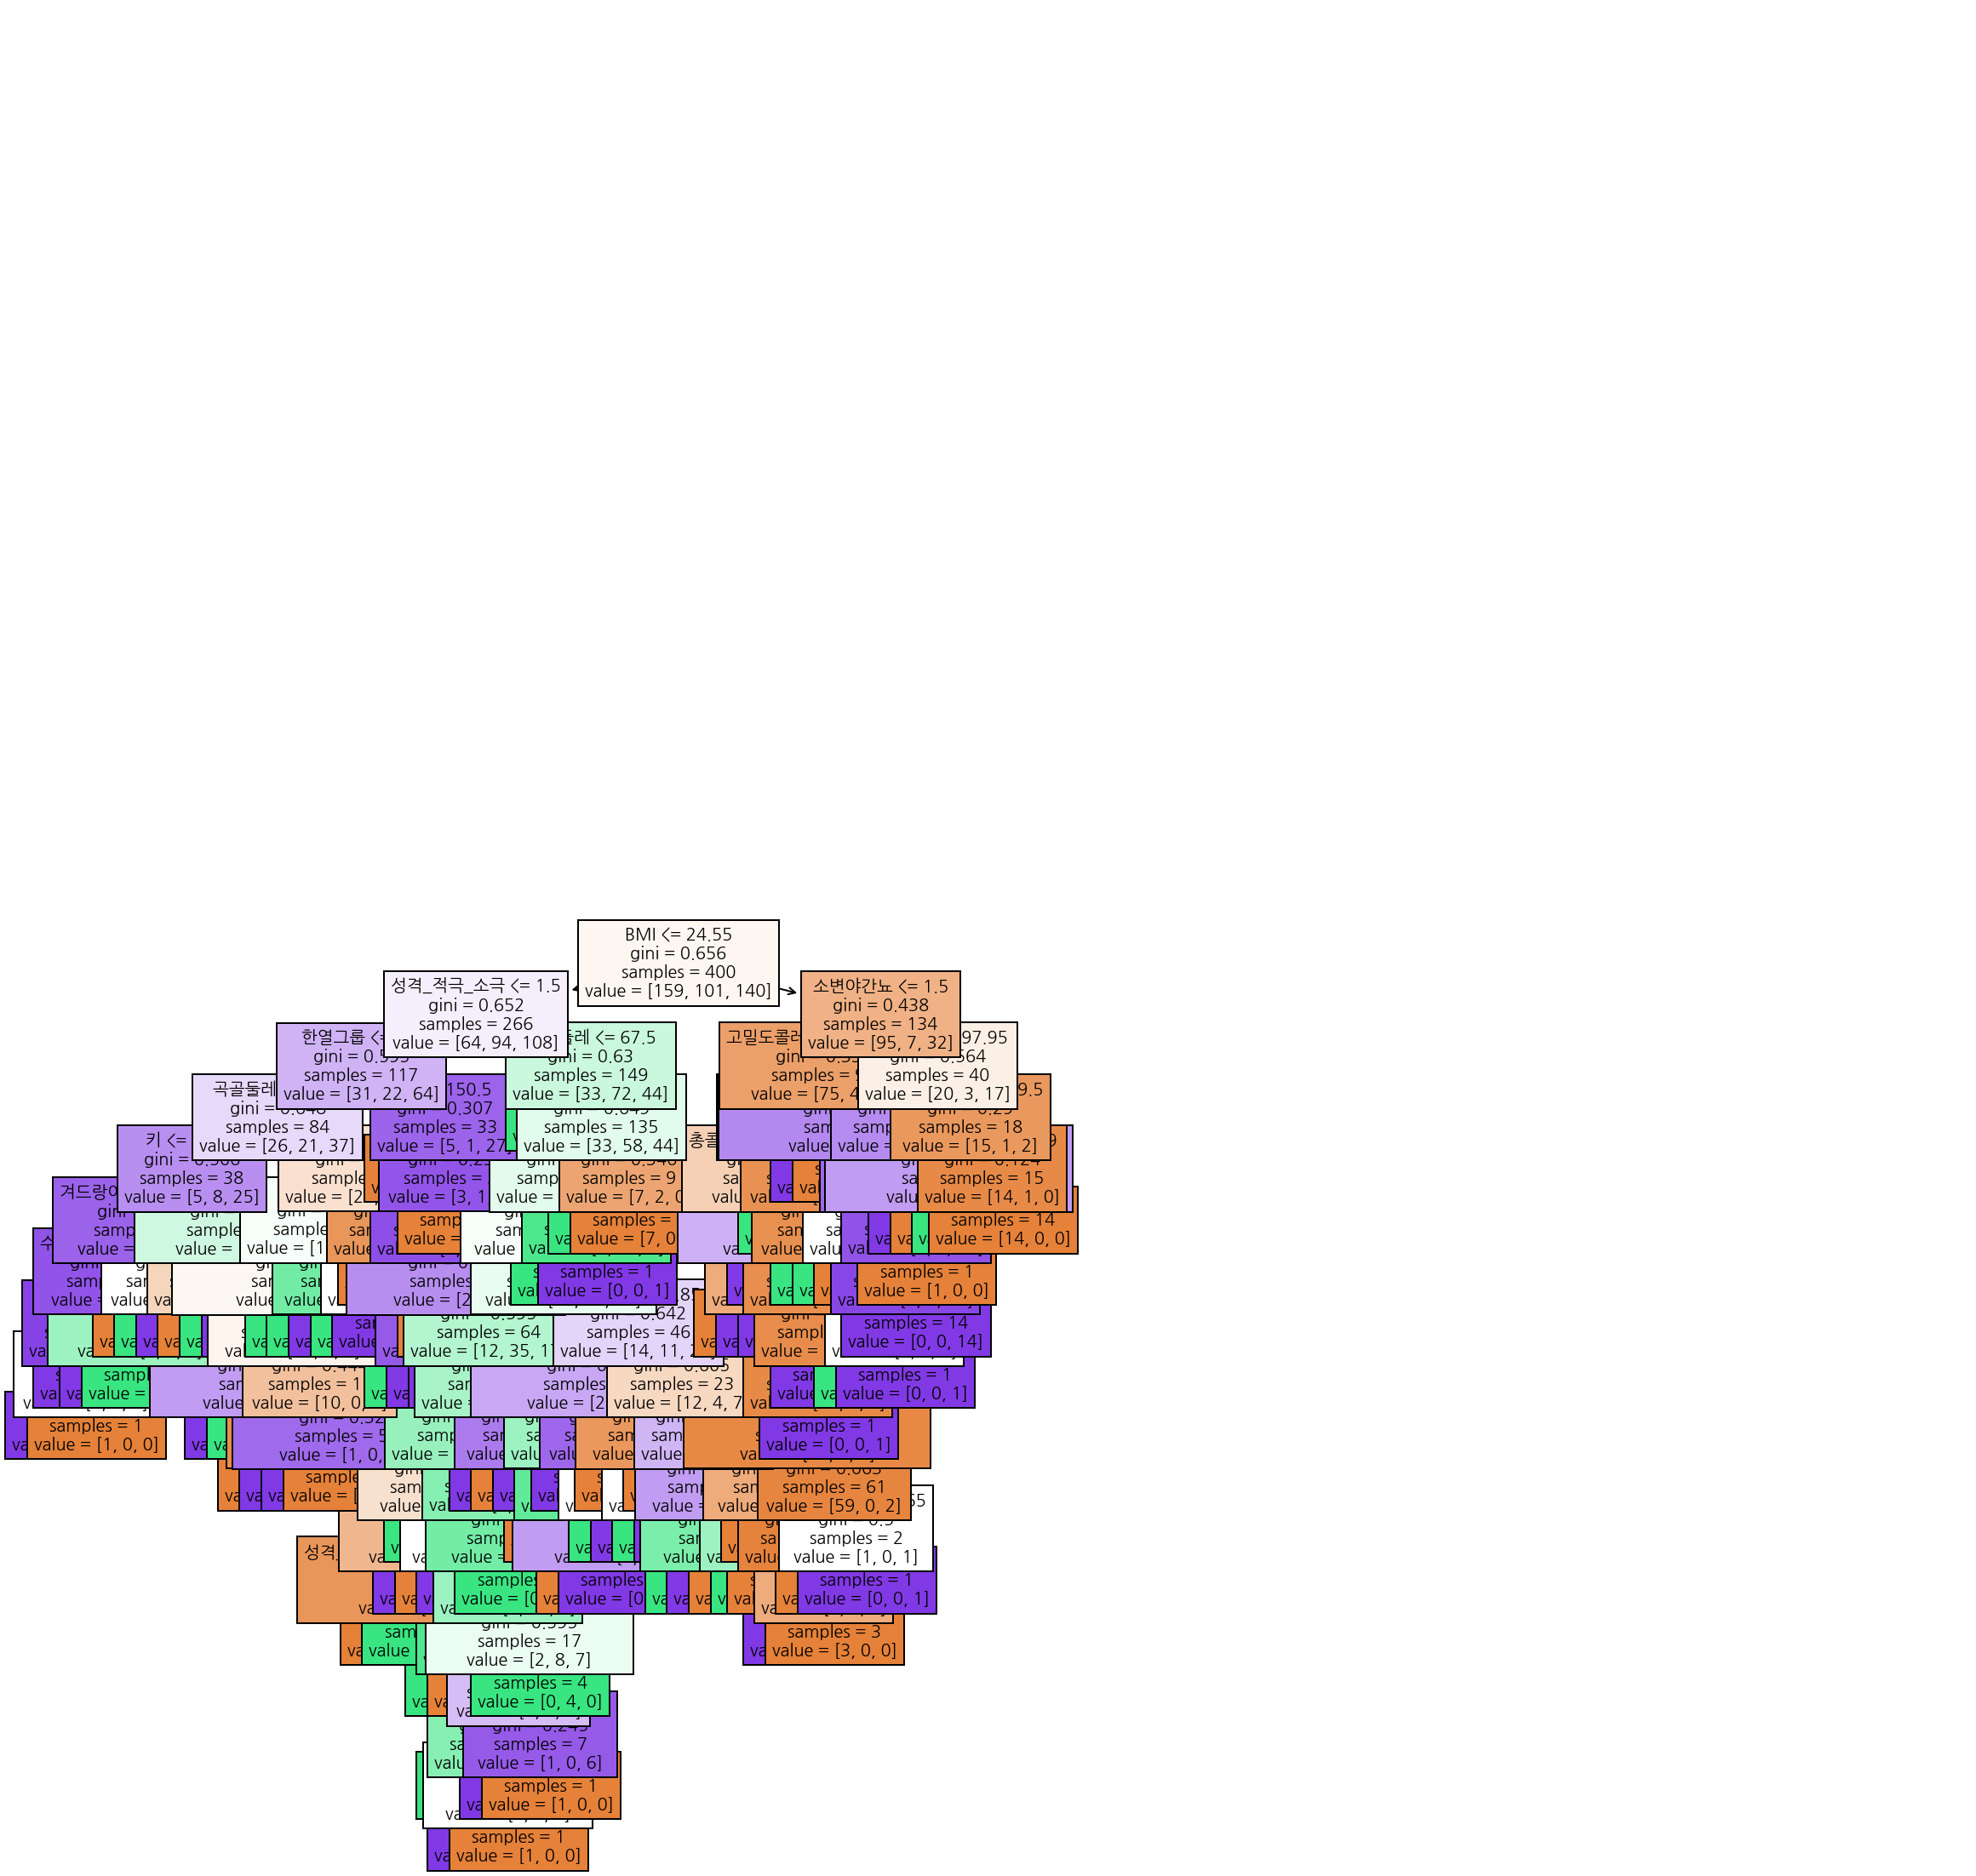

In [164]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
tree = plot_tree(model,
                 feature_names=feature_names,
                 filled=True,
                 fontsize=10)

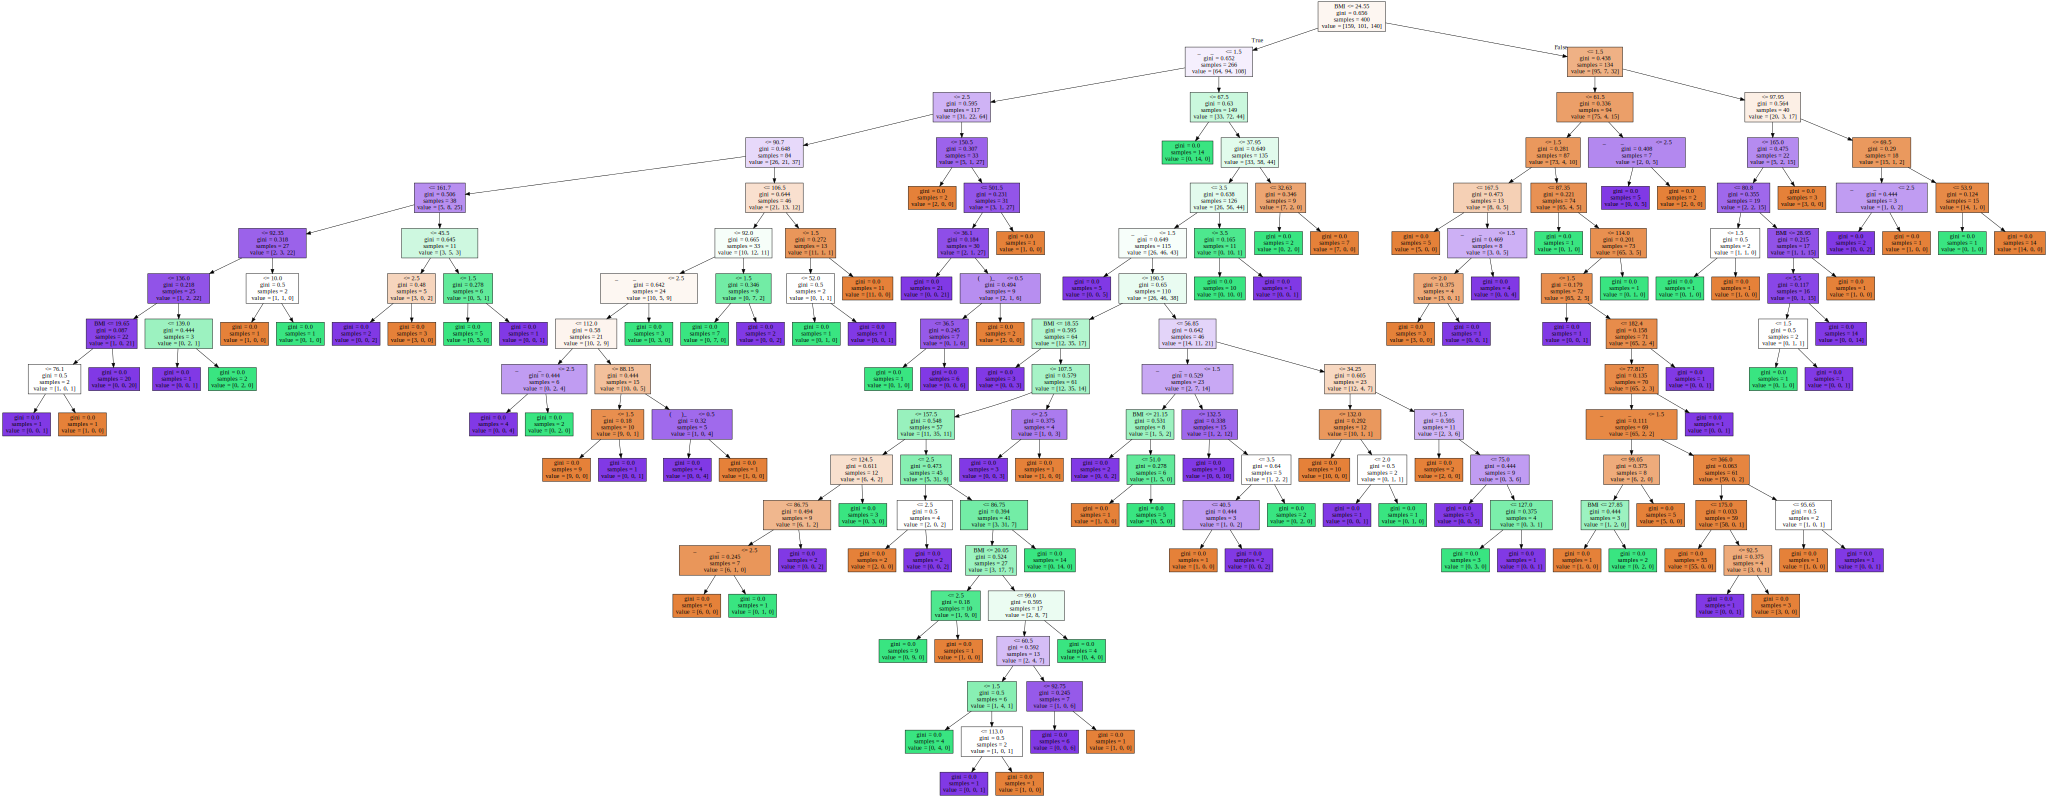

In [165]:
#graphviz 를 통해 시각화 합니다.
#graphviz 는 별도의 설치가 필요합니다. 
#graphviz 와 파이썬에서 graphviz 를 사용할 수 있게 해주는 도구 2가지를 설치해 주셔야 합니다.
import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model,
                           feature_names = feature_names,
                           filled=True)
graphviz.Source(dot_tree)

In [166]:
# 피처의 중요도를 추출하기

model.feature_importances_

array([0.        , 0.01874256, 0.00983777, 0.        , 0.        ,
       0.        , 0.        , 0.01201917, 0.        , 0.03807457,
       0.        , 0.01742897, 0.        , 0.        , 0.        ,
       0.00857813, 0.00298641, 0.        , 0.00508333, 0.02319272,
       0.01016667, 0.        , 0.        , 0.0144875 , 0.00571875,
       0.01875481, 0.00915   , 0.        , 0.01016667, 0.02079357,
       0.        , 0.        , 0.01714118, 0.01186111, 0.        ,
       0.007625  , 0.00571875, 0.00693182, 0.        , 0.0038125 ,
       0.01950114, 0.        , 0.0068625 , 0.        , 0.01818755,
       0.01679456, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.04326468, 0.02326178, 0.15897055, 0.00711667,
       0.04137621, 0.02623361, 0.00645768, 0.04418085, 0.01034822,
       0.06430281, 0.04934752, 0.01724098, 0.05848859, 0.02902304,
       0.02191212, 0.0331016 , 0.00924661, 0.01650874, 0.        ,
       0.        , 0.        ])

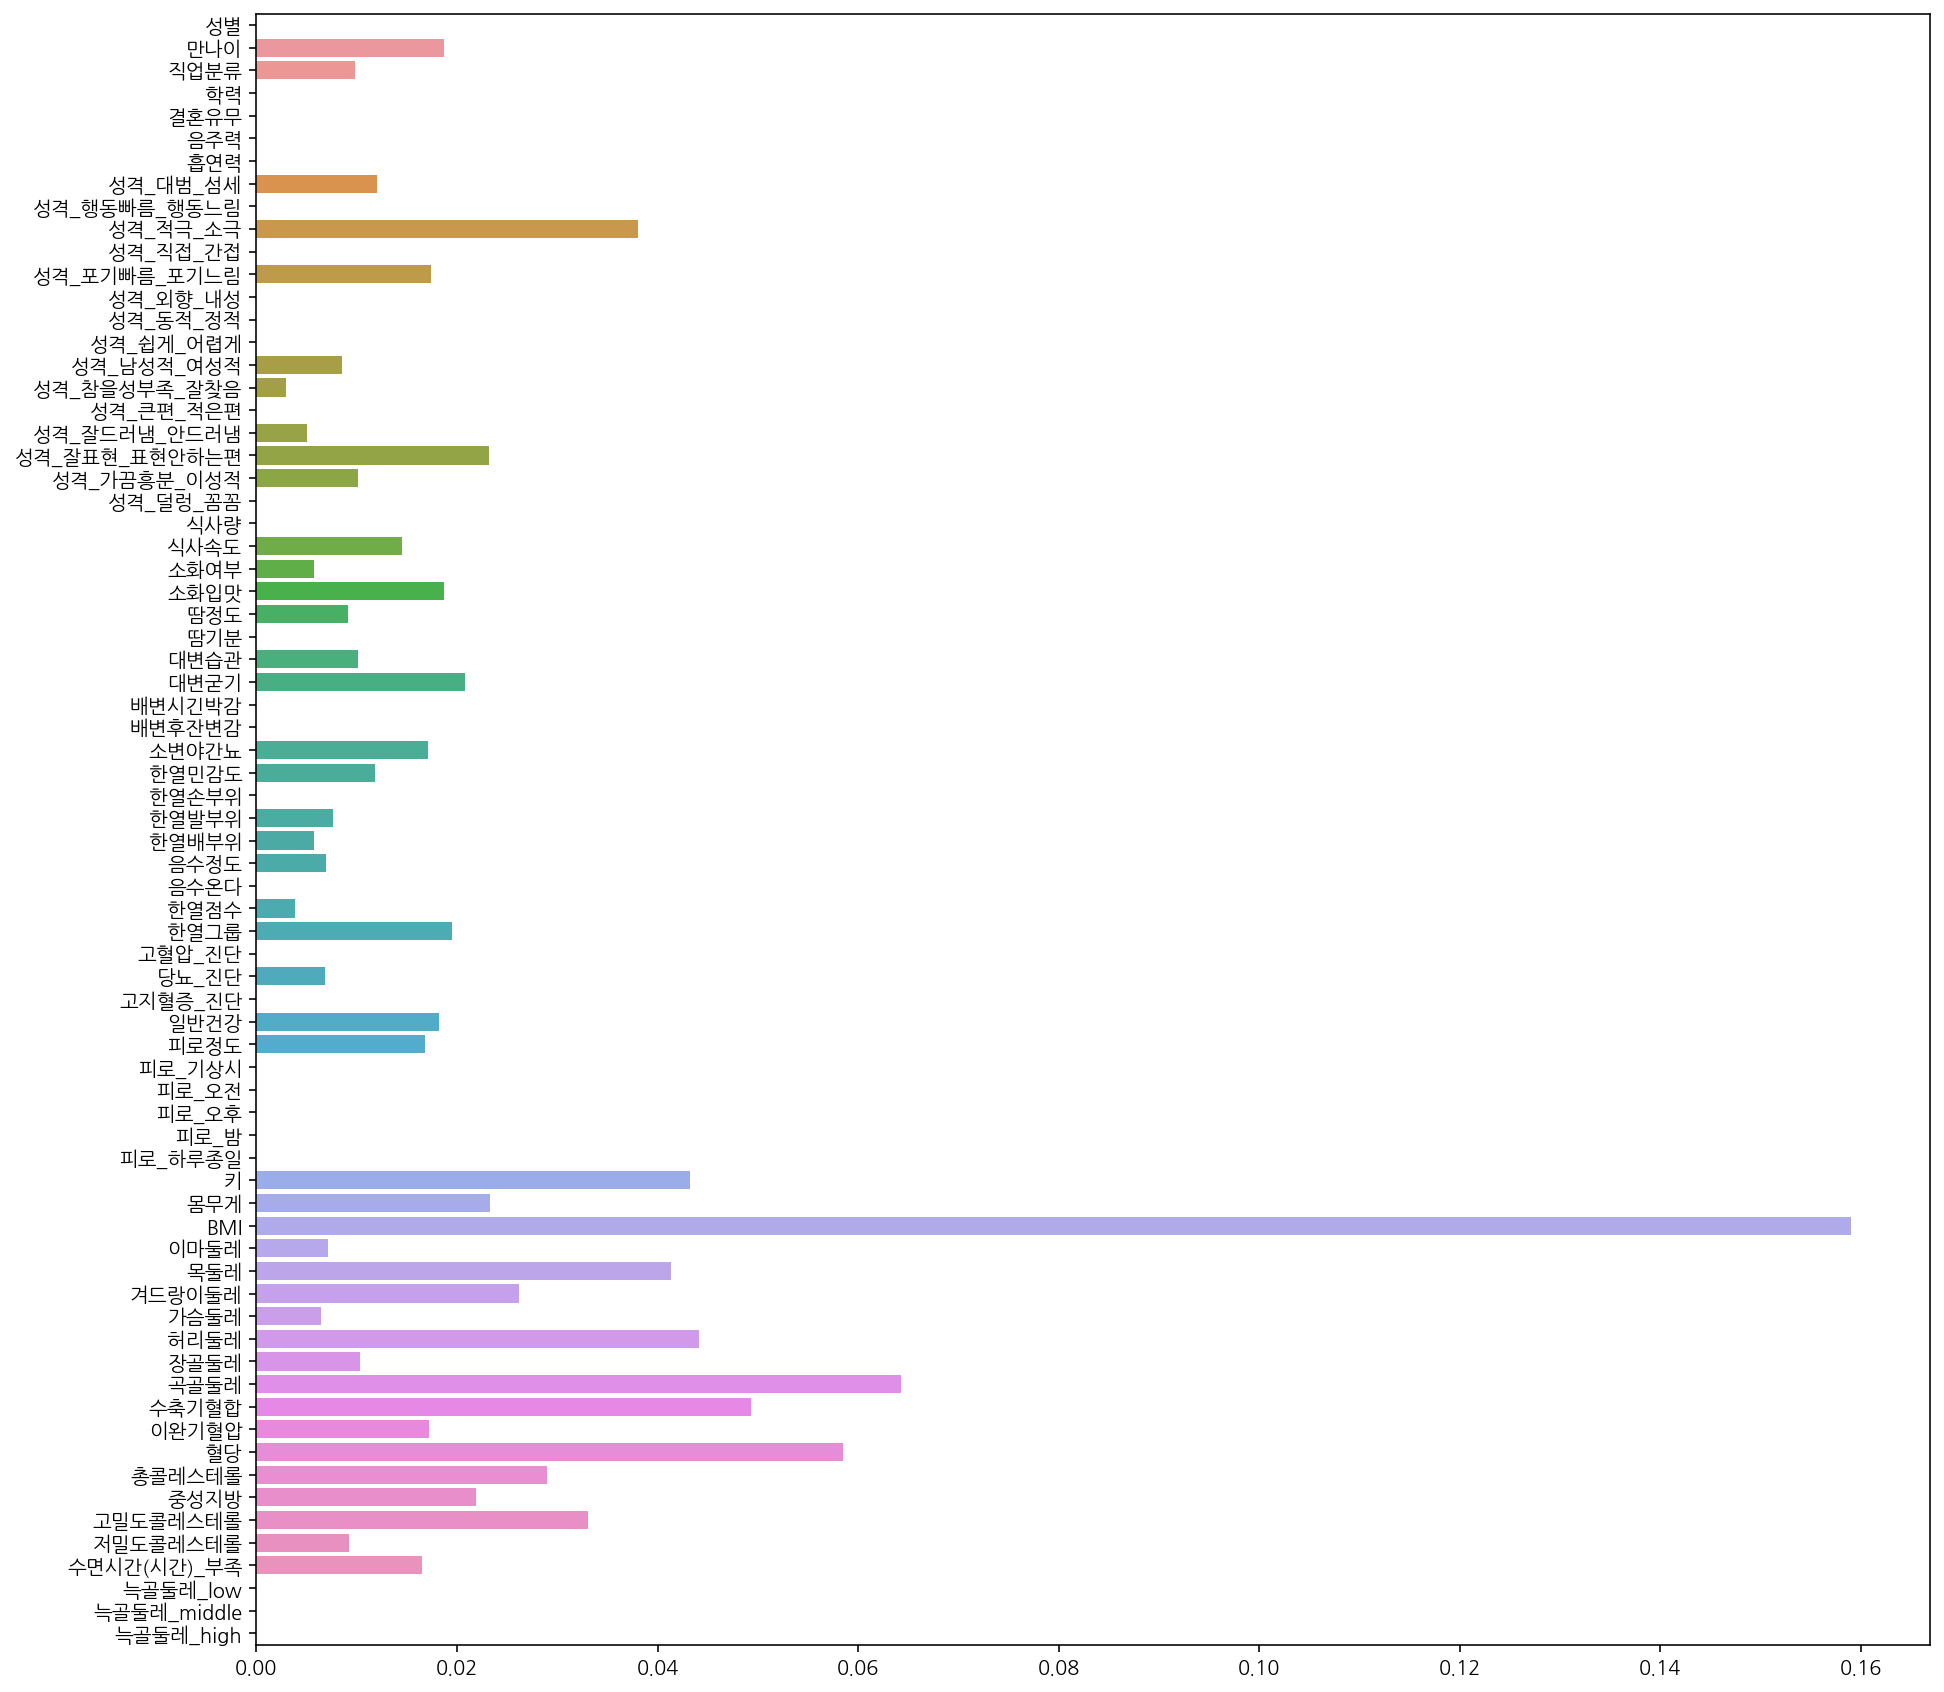

In [167]:
# 피처의 중요도 시각화 하기
plt.figure(figsize=(15,15))
sns.barplot(x=model.feature_importances_, y=feature_names)

In [168]:
## 새로 만드는 컬럼들은 맨 마지막의 열에 생기므로 그래프의 맨 아래를 보면 된다.
#1 수면시간(시간) 부족의 변수화 후 변수 중요도가 조금은 있는 것을 확인할 수 있다.
#2 늑골둘레의 변수형 변수화 후 위의 그래프를 보았을 때는 중요도가 거의 없다.

# 정확도(Accuracy) 측정하기

In [169]:
# 예측의 정확도를 구해봅니다.
y_predict_list = y_predict.tolist()
y_test_list = y_test.tolist()
acc = 0
for i in range(len(y_predict_list)):
  if y_predict_list[i] == y_test_list[i]:
    acc += 1
print("정확도 : ", acc/len(y_predict_list))

정확도 :  0.56


In [170]:
# 위에서 처럼 직접 구할 수도 있지만 미리 구현된 알고리즘을 가져와 사용합니다.

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

56.00000000000001

In [171]:
# model 의 score 로 점수를 계산합니다.
model.score(X_test, y_test) * 100

56.00000000000001

In [172]:
#1 기본 decision_tree model: acc 46%
#2 수면시간(시간)의 범주화 후: acc 53%
#3 늑골둘레의 범주화 후: acc 56%